In [1]:
import sys
sys.path.append("..")

from deepvideo import *

Using TensorFlow backend.


## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = get_ucf_dataset()

In [3]:
data = VideoLoader(32, input_shape=(1, 244, 244, 3), data_aug=get_augmentations(), label_mapping='../../UCF-101-dataset/Class Index.txt')

In [4]:
data.from_list('../../UCF-101-dataset/UCF-101-jpeg/', (X_train, y_train), (X_test, y_test))

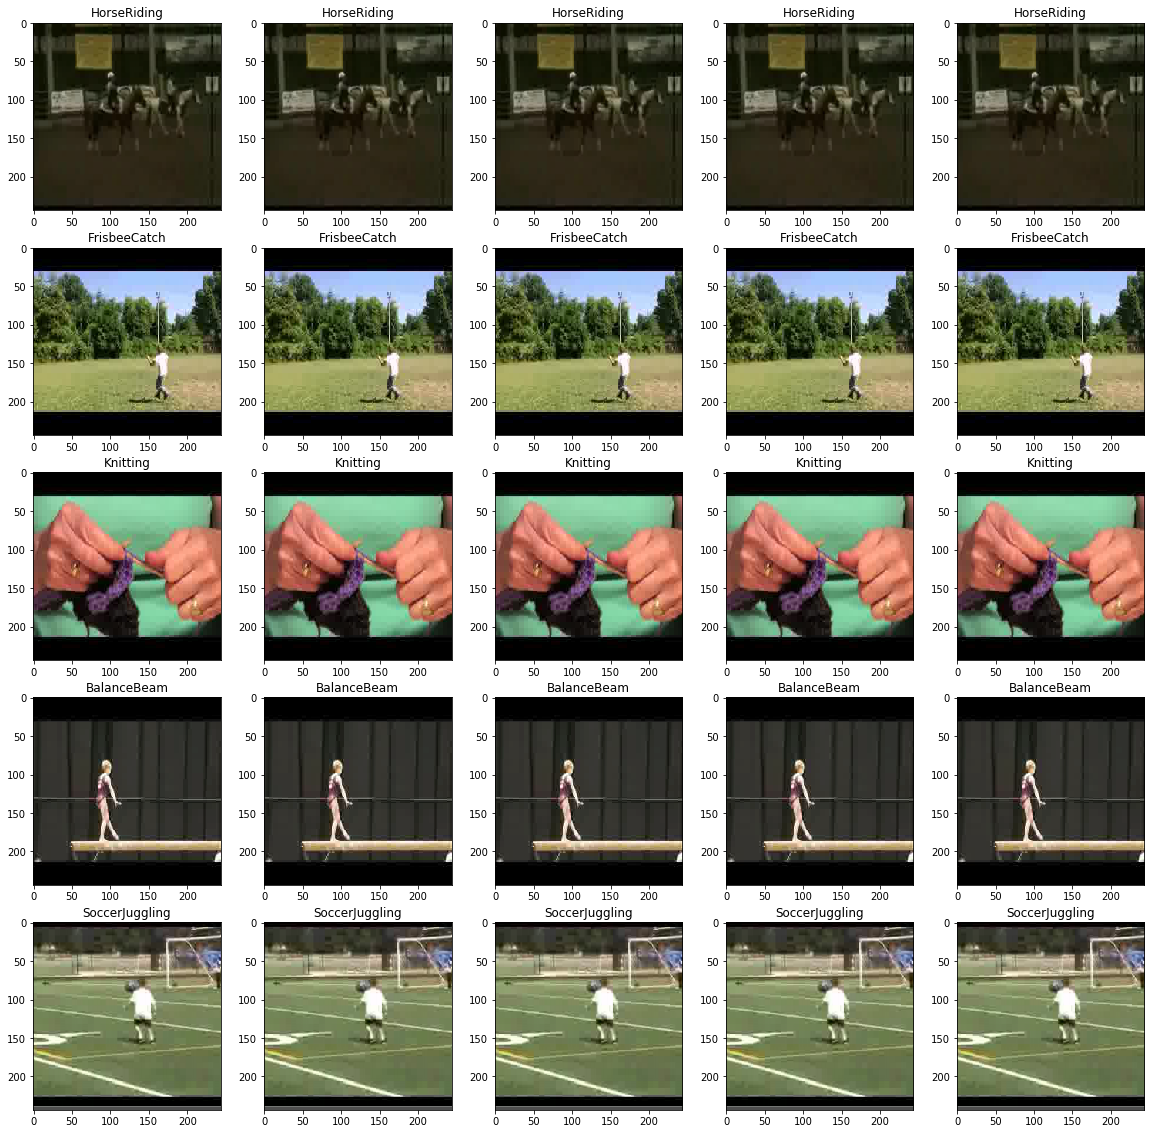

In [5]:
data.show_frames()

In [6]:
data.show_videos()

## Building tfrecord dataset

In [7]:
# data.build_tfrecord_dataset('../tfdataset', 10)

In [8]:
data.use_tfrecord_as_generator('../tfdataset/')

## Defining the model

In [9]:
model = ResNet(classes=data.n_classes, input_shape=data.input_shape)

/home/gustavo/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


## Training

In [10]:
learner = VideoLearner(data, model)

In [11]:
learner.unfreeze()

In [12]:
learner.lr_find(2)

Epoch 1/2
240/297 [=======================>......] - ETA: 38s - loss: 4.5983 - acc: 0.0676

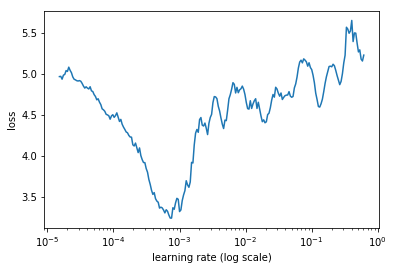

In [13]:
learner.recorder.plot_loss()

In [9]:
learner.fit_one_cycle(10, 0.00007)

Epoch 1/10
297/297 [==============================] - 295s 993ms/step - loss: 4.6096 - acc: 0.0339 - val_loss: 4.7928 - val_acc: 0.0082
Epoch 2/10
297/297 [==============================] - 281s 945ms/step - loss: 3.9380 - acc: 0.1612 - val_loss: 4.3548 - val_acc: 0.0604
Epoch 3/10
297/297 [==============================] - 269s 905ms/step - loss: 3.1706 - acc: 0.3244 - val_loss: 2.9781 - val_acc: 0.3594
Epoch 4/10
297/297 [==============================] - 272s 916ms/step - loss: 2.4380 - acc: 0.4710 - val_loss: 2.2248 - val_acc: 0.4944
Epoch 5/10
297/297 [==============================] - 280s 942ms/step - loss: 1.9109 - acc: 0.5622 - val_loss: 1.8644 - val_acc: 0.5538
Epoch 6/10
297/297 [==============================] - 295s 993ms/step - loss: 1.4877 - acc: 0.6510 - val_loss: 1.6237 - val_acc: 0.5911
Epoch 7/10
297/297 [==============================] - 256s 863ms/step - loss: 1.1789 - acc: 0.7171 - val_loss: 1.4663 - val_acc: 0.6319
Epoch 8/10
297/297 [============================

In [10]:
learner.save('../models/rgb/ResNet/rgb_ResNet_68')

In [11]:
learner.fit_one_cycle(5, 1e-6)

Epoch 1/5
297/297 [==============================] - 296s 995ms/step - loss: 0.5307 - acc: 0.8749 - val_loss: 1.2215 - val_acc: 0.6867
Epoch 2/5
297/297 [==============================] - 269s 907ms/step - loss: 0.5573 - acc: 0.8644 - val_loss: 1.2199 - val_acc: 0.6904
Epoch 3/5
297/297 [==============================] - 274s 921ms/step - loss: 0.5478 - acc: 0.8668 - val_loss: 1.2182 - val_acc: 0.6886
Epoch 4/5
297/297 [==============================] - 276s 930ms/step - loss: 0.5346 - acc: 0.8714 - val_loss: 1.2205 - val_acc: 0.6920
Epoch 5/5
297/297 [==============================] - 292s 984ms/step - loss: 0.5143 - acc: 0.8771 - val_loss: 1.2188 - val_acc: 0.6896


In [12]:
learner.save('../models/rgb/ResNet/rgb_ResNet_69')

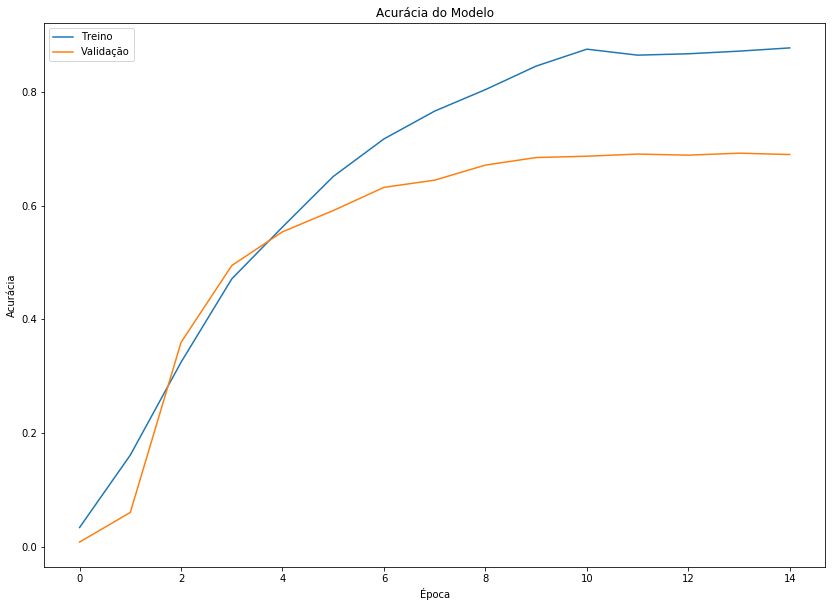

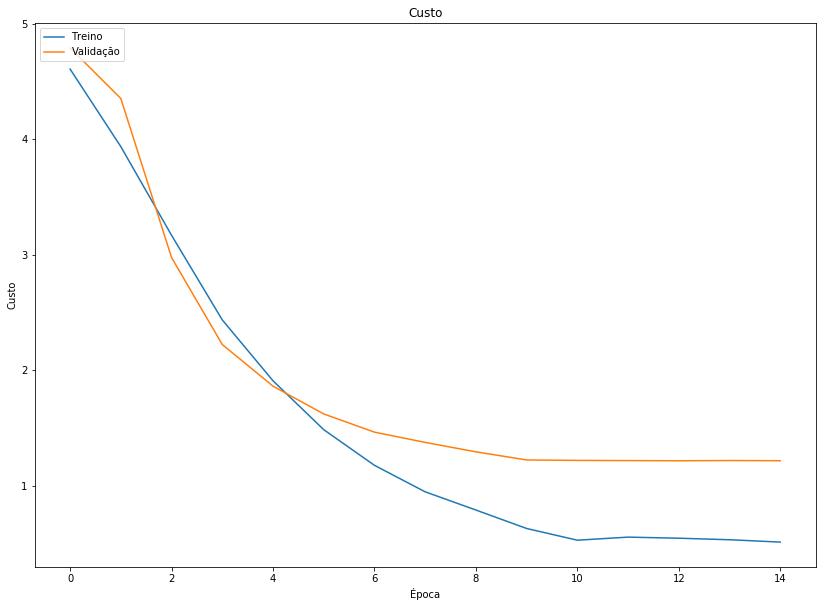

In [13]:
learner.plot_history()

In [14]:
learner.save_report('../models/rgb/ResNet/')

AttributeError: 'VideoLearner' object has no attribute 'recorder'

In [15]:
learner.load('../models/rgb/ResNet/rgb_ResNet_69')

## Interpreting

In [17]:
interp = VideoClassifier(learner, max_frames=128)


100%|██████████| 3783/3783 [41:11<00:00,  1.53it/s]


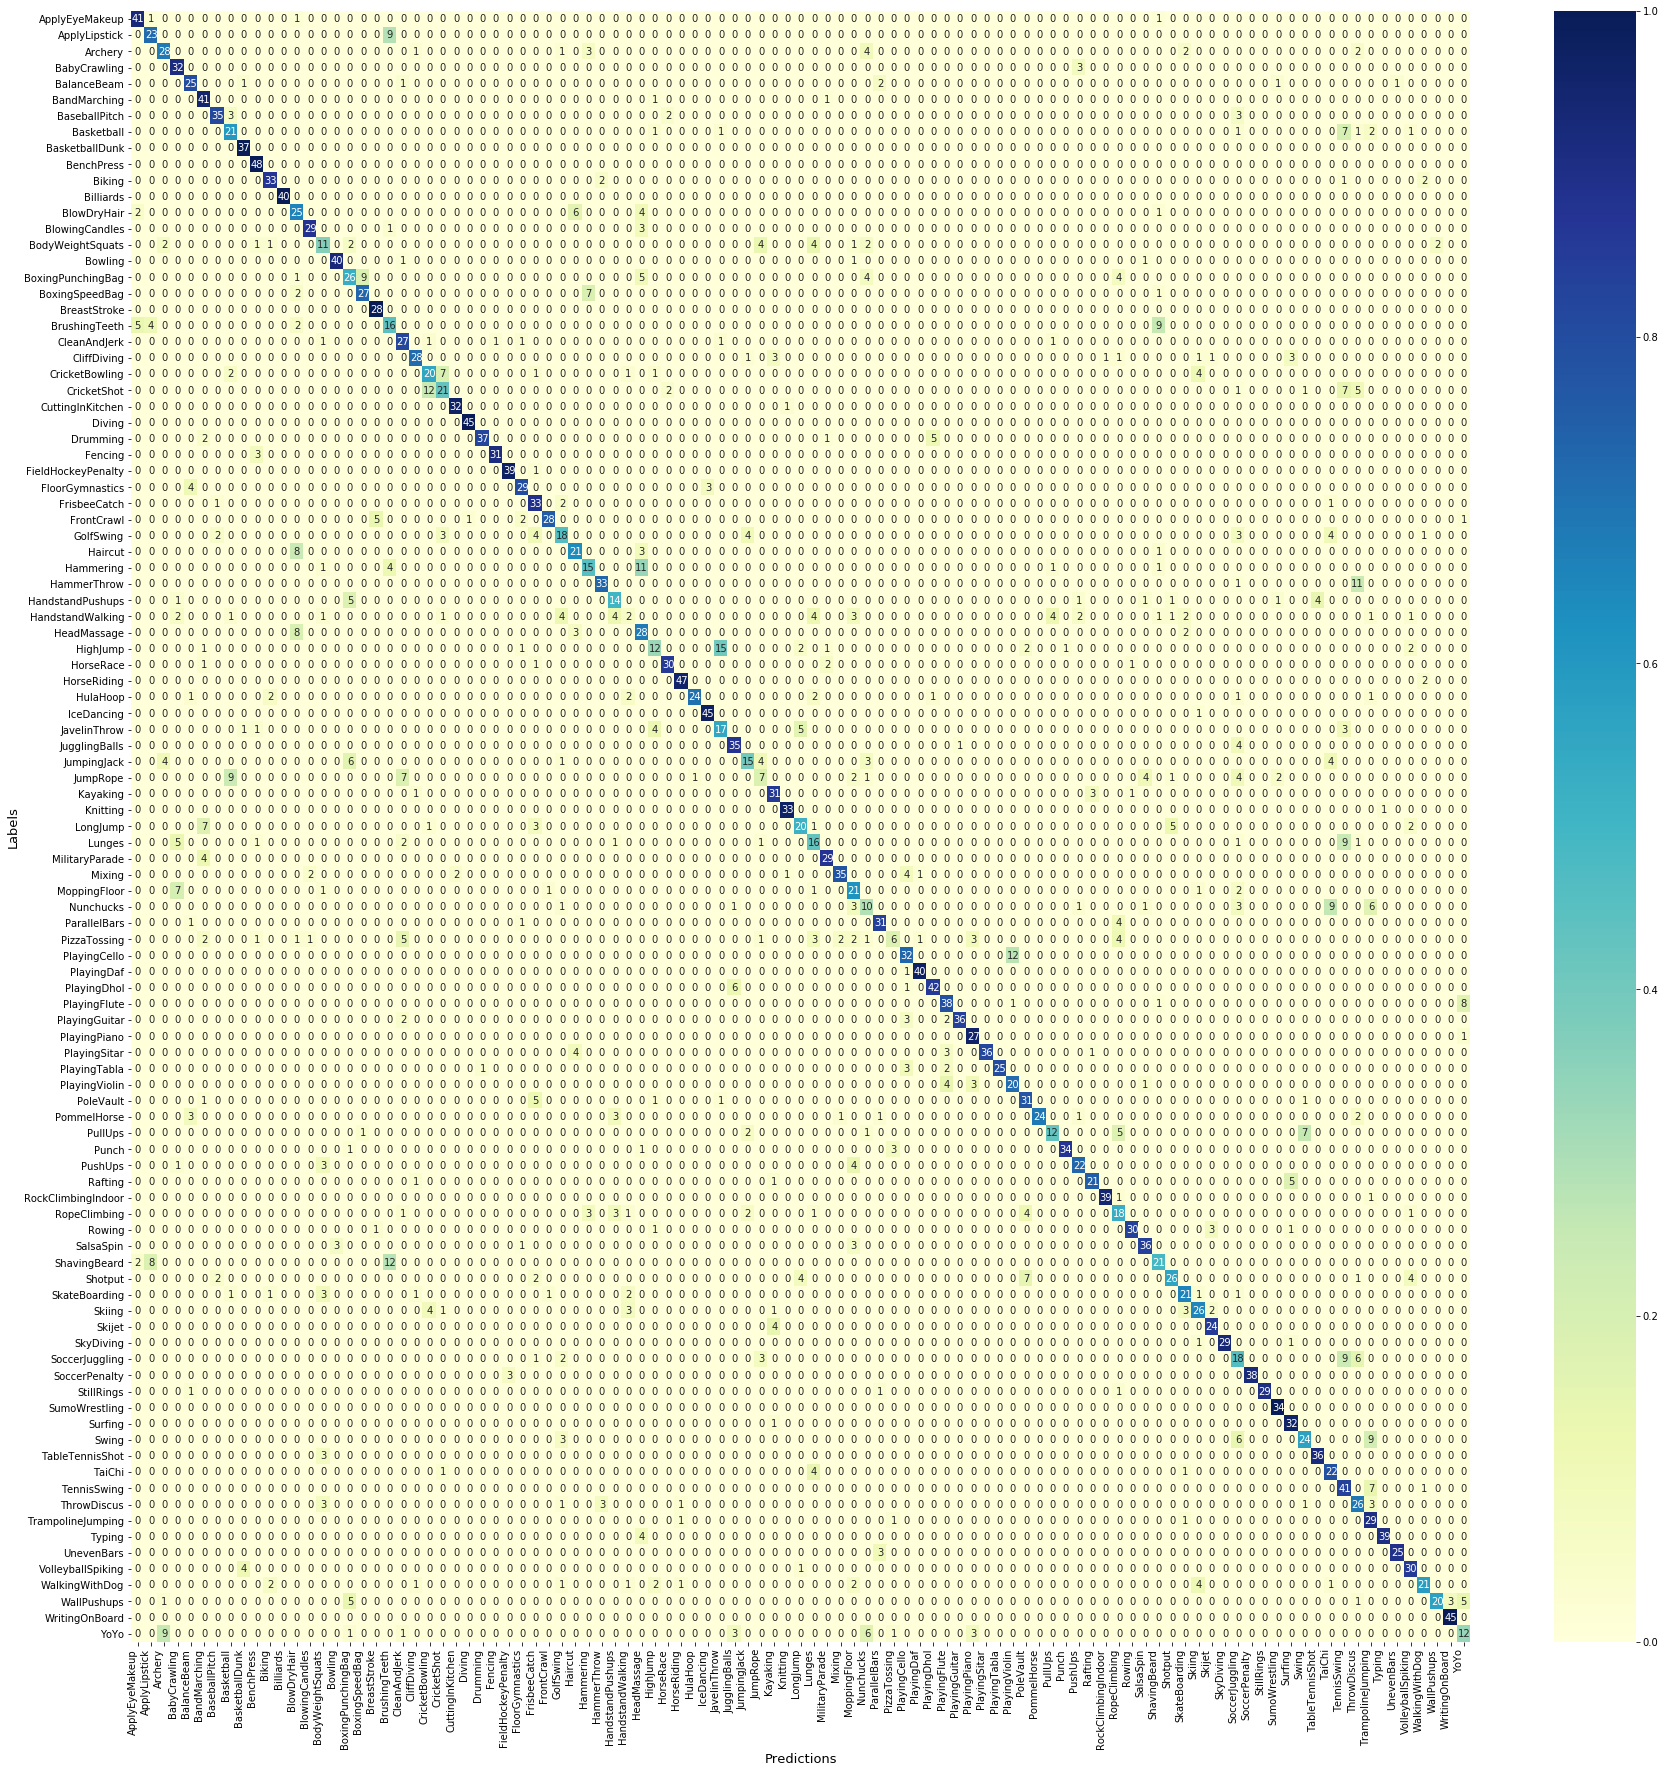

In [18]:
interp.plot_confusion_matrix()

In [19]:
interp.report()

Accuracy: 0.7406819984139572
                    precision    recall  f1-score   support

    ApplyEyeMakeup       0.82      0.93      0.87        44
     ApplyLipstick       0.64      0.72      0.68        32
           Archery       0.64      0.68      0.66        41
      BabyCrawling       0.67      0.91      0.77        35
       BalanceBeam       0.71      0.81      0.76        31
      BandMarching       0.69      0.95      0.80        43
     BaseballPitch       0.88      0.81      0.84        43
        Basketball       0.57      0.60      0.58        35
    BasketballDunk       0.86      1.00      0.92        37
        BenchPress       0.87      1.00      0.93        48
            Biking       0.85      0.87      0.86        38
         Billiards       1.00      1.00      1.00        40
       BlowDryHair       0.52      0.66      0.58        38
    BlowingCandles       0.91      0.88      0.89        33
  BodyWeightSquats       0.41      0.37      0.39        30
          